In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time 
import csv
import os
from pprint import pprint
from pandas.io.json import json_normalize


In [2]:
df = pd.read_csv("Poverty_by_state_2018.csv")

In [3]:
df.rename( columns={'new column name':'State'}, inplace=True )
df

,Unnamed: 0,Percent in Poverty (All),90% CI Lower,90%CI Upper,Children ages 0-17 in Poverty,90% CI Lower.1,90%CI Upper.1
0,Alabama,16.8,16.5,17.1,23.9,23.2,24.6
1,Alaska,11.1,10.5,11.7,14.5,13.4,15.6
2,Arizona,14.1,13.8,14.4,20.4,19.7,21.1
3,Arkansas,16.8,16.3,17.3,23.8,22.8,24.8
4,California,12.8,12.7,12.9,17.4,17.1,17.7
5,Colorado,9.7,9.5,9.9,12.1,11.4,12.8
6,Connecticut,10.3,10.0,10.6,13.8,13.1,14.5
7,Delaware,12.2,11.6,12.8,17.6,16.4,18.8
8,District of Columbia,16.1,15.2,17.0,24.5,21.5,27.5
9,Florida,13.7,13.5,13.9,20.0,19.5,20.5


In [4]:
df_pop = pd.read_csv("CSV Folder\\SCPRC-EST2019-18+POP-RES.csv")
df_pop= df_pop[["NAME", "POPESTIMATE2019","POPEST18PLUS2019","PCNT_POPEST18PLUS"]]

In [5]:
df_pop = df_pop.rename(columns = {"Name": "State","POPESTIMATE2019":"2019 Pop Est","POPEST18PLUS2019":"2019 18+","PCNT_POPEST18PLUS":"Percent 18+"})

In [6]:
df_pop

,NAME,2019 Pop Est,2019 18+,Percent 18+
0,United States,328239523,255200373,77.7
1,Alabama,4903185,3814879,77.8
2,Alaska,731545,551562,75.4
3,Arizona,7278717,5638481,77.5
4,Arkansas,3017804,2317649,76.8
5,California,39512223,30617582,77.5
6,Colorado,5758736,4499217,78.1
7,Connecticut,3565287,2837847,79.6
8,Delaware,973764,770192,79.1
9,District of Columbia,705749,577581,81.8


In [9]:
# URL for GET requests to retrieve global count data and all countries data COUNTRIES
url1 = "https://coronavirus-19-api.herokuapp.com/all"
response = requests.get(url1)
print(response.json())
All_data = json_normalize(response.json(), errors='ignore')
print(All_data)

# uploading cases/deaths by country and formatting dataframe
url2 = "https://coronavirus-19-api.herokuapp.com/countries"
response2 = requests.get(url2)
Countries_df = json_normalize(response2.json(), errors='ignore')
Countries_df = Countries_df.iloc[:,[0,1,2,3,4,5,6,7]] 

#imported data on SES and created a dataframe
globses = pd.read_csv("CSV Folder/GLOB.csv", encoding = 'latin-1')
globses = globses[globses["year"]==2010]
globses = globses.reset_index(drop = True)

#merged ses data with countries Covid Data
combined_Countries_df_data = pd.merge(Countries_df, globses, how="left", on=["country", "country"])  
combined_Countries_df_data.dropna(inplace =True) 
combined_Countries_df_data.reset_index(inplace = True, drop = True) 

#Clean up column header names
combined_Countries_df_data.rename(columns = {"country":"Country",
                           "cases":"Total Cases",
                           "todayCases":"Cases Today",
                           "deaths": "Deaths",
                           "todayDeaths":"Deaths Today",
                           "recovered":"Total Recovered",
                           "active":"Active Cases",
                           "critical": "Critical",
                           "gdppc": "GDP per Capita",
                           "yrseduc":"Avg Years Education"}, inplace = True)

#read in government type file and inner merge on country
gov_df = pd.read_csv("CSV Folder/Gov_type.csv")
combined_Countries_df_data2 = combined_Countries_df_data.merge(gov_df, how="inner", on="Country") 
#print(combined_Countries_df_data) use this for the pie chart



{'cases': 2629951, 'deaths': 183723, 'recovered': 716731}
     cases  deaths  recovered
0  2629951  183723     716731


In [13]:
combined_Countries_df_data2.head(12)
top_10 =combined_Countries_df_data2[combined_Countries_df_data2["Total Cases"]>22000]
top_10

,Country,Total Cases,Cases Today,Deaths,Deaths Today,Total Recovered,Active Cases,Critical,unid,wbid,year,SES,GDP per Capita,Avg Years Education,popshare,Government Type
0,Spain,208389,4211,21717,435,85915.0,100757,7705,724.0,ESP,2010.0,85.359718,32506.434,10.3821,0.006912,parliamentary constitutional monarchy
1,Italy,187327,3370,25085,437,54543.0,107699,2384,380.0,ITA,2010.0,85.016357,36201.160,9.5096,0.008797,parliamentary republic
2,France,159877,1827,21340,544,40657.0,97880,5218,250.0,FRA,2010.0,88.194969,36872.227,10.5329,0.009650,semi-presidential republic
3,Germany,150062,1609,5250,164,99400.0,45412,2908,276.0,DEU,2010.0,92.546394,40428.723,11.8231,0.012136,federal parliamentary republic
4,Turkey,98674,3083,2376,117,16477.0,79821,1814,792.0,TUR,2010.0,60.248875,17076.605,7.0157,0.010731,presidential republic
5,Iran,85996,1194,5391,94,63113.0,17492,3311,364.0,IRN,2010.0,76.485092,17517.434,8.5859,0.011019,theocratic republic
6,Brazil,45757,2678,2906,165,25318.0,17533,8318,76.0,BRA,2010.0,61.067955,14405.931,7.5391,0.029474,federal presidential republic
7,Belgium,41889,933,6262,264,9433.0,26194,1020,56.0,BEL,2010.0,89.668945,41086.551,10.5453,0.001617,federal parliamentary democracy under a consti...
8,Canada,39813,1391,1966,132,13647.0,24200,557,124.0,CAN,2010.0,93.772118,40699.355,12.0827,0.005046,federal parliamentary democracy (Parliament of...
9,Switzerland,28268,205,1509,31,19900.0,6859,386,756.0,CHE,2010.0,91.012245,55541.672,9.8763,0.001161,federal republic (formally a confederation)


In [14]:
x_axis = ('Spain','Italy','France','Germany','Turkey','Iran','Brazil','Belgium','Canada','Switzerland')
y_pos = np.arange(len(x_axis))
y_axis = (208389,187327,159877,150062,98674,85996,45757,41889,39813,28268)



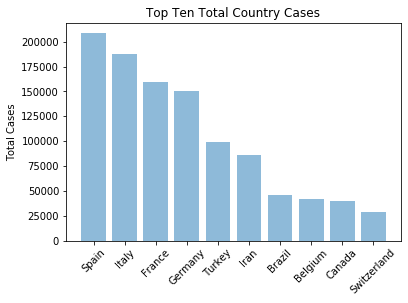

In [17]:
plt.bar(x_axis, y_axis, align='center', alpha=0.5)
plt.xticks(y_pos, x_axis, rotation = 45)
plt.ylabel('Total Cases')
plt.title('Top Ten Total Country Cases')

plt.show()

In [18]:
labels =('Spain','Italy','France','Germany','Turkey','Iran','Brazil','Belgium','Canada','Switzerland')
cases_recovered = (85915,54543,40657,99400,16477,63113,25318,9433,13647,19900)




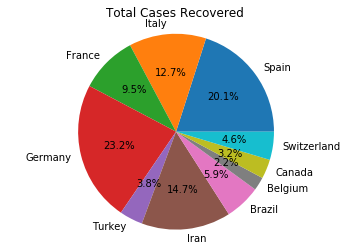

In [19]:

plt.pie(cases_recovered,labels=labels,autopct='%1.1f%%')
plt.title('Total Cases Recovered')
plt.axis('equal')
plt.show()

In [ ]:
Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,
Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan
Minnesota
Mississippi
Missouri
Montana
Nebraska
Nevada
New Hampshire
New Jersey
New Mexico
New York
North Carolina
North Dakota
Ohio
Oklahoma
Oregon
Pennsylvania
Rhode Island
South Carolina
South Dakota
Tennessee
Texas
Utah
Vermont
Virginia
Washington
West Virginia
Wisconsin
Wyoming


In [20]:
# import csv file that is a breakdown of cases and deaths per day by state and county
State_csv_df = pd.read_csv("CSV Folder/us-counties.csv.txt")

#group by state and date so that data is no longer at the county level, but at the state level
state_df = df.groupby(["state","date"])

#Create a data frame that has total cases by date by state
cases = state_df["cases"].sum()
workable_df = pd.DataFrame(cases)
workable_df = workable_df.reset_index()

#get the data for deaths per state per day into a series format to add to the cases dataframe
deaths = state_df["deaths"].sum()
death=pd.DataFrame(deaths)
work_death=death.reset_index()
DEAD = work_death["deaths"]

# Add Deaths column to the cases dataframe
workable_df["Deaths"]=DEAD

#Create final dataframe with just the columns we are interested in
final_df = workable_df[["date","state","cases","Deaths"]]

#Sort final df by date and re-index
final_df = final_df.sort_values("date")
final_df = final_df.reset_index(drop = True)


KeyError: 'state'